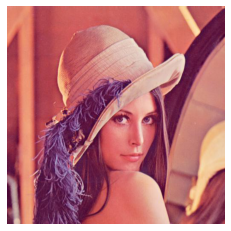

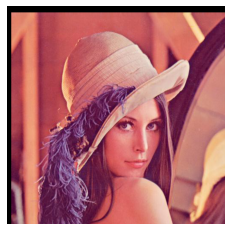

In [2]:
# Image Translation

import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("image.jpg")

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix and variables
xtranslation = 10
ytranslation = 15
Matrix = np.float32([[1, 0, xtranslation],
                [0, 1, ytranslation],
                [0, 0, 1]])
# apply a transformation to the image
translated_img = cv2.warpPerspective(img, Matrix, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the new image
plt.imshow(translated_img)
plt.show()
# save the resulting image to disk
plt.imsave("translated.jpg", translated_img)

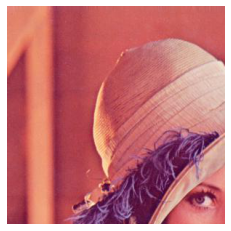

In [8]:
# cropping 
croppeddimension=300
cropped_img = img[0:croppeddimension, 0:croppeddimension]
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(cropped_img)
plt.show()
# save the resulting image to disk
plt.imsave("cropped.jpg", cropped_img)

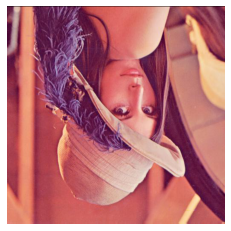

In [13]:
#Verticle Flip

M = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])
VerticleFlip_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(VerticleFlip_img)
plt.show()
# save the resulting image to disk
plt.imsave("VerticleFlip.jpg", VerticleFlip_img)

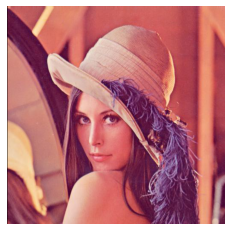

In [14]:
#Horizontal Flip

M = np.float32([[-1, 0, cols],
                 [ 0, 1, 0   ],
                 [ 0, 0, 1   ]])
# apply transformation to the image
HorizontalFlip_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(HorizontalFlip_img)
plt.show()
# save the resulting image to disk
plt.imsave("HorizontalFlip.jpg", HorizontalFlip_img)

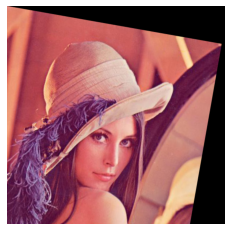

In [15]:
# rotation 

degrees=10
#angle from degree to radian
angle = np.radians(degrees)
#transformation matrix for Rotation
M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
rotated_img = cv2.warpPerspective(img, M, (int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(rotated_img)
plt.show()
# save the resulting image to disk
plt.imsave("rotated.jpg", rotated_img)

In [ ]:
def hist_plot(img):
      
    count =[]
      
    r = []
      
    for k in range(0, 256):
        r.append(k)
        count1 = 0
          
        for i in range(m):
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (r, count)
  
  
r1, count1 = hist_plot(image)
  
plt.stem(r1, count1)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')
   
constant = (255-0)/(img.max()-img.min())
img_stretch = img * constant
r, count = hist_plot(img_stretch)
  
plt.stem(r, count)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the stretched image')
   
cv2.imwrite('Stretched_Image.jpg', img_stretch)

205 65


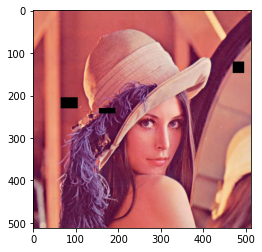

-1

In [34]:
import random

img_copy=img.copy()

blue = green = red = 0
for itterations in range(0,3):
    rand_rows = random.randint(0,rows)
    rand_cols = random.randint(0,cols)
    rand_sizex = random.randint(0,50)
    rand_sizey = random.randint(0,50)
    for indexx in range(0,rand_sizex):
        for indexy in range(0,rand_sizey):
            if rand_rows + indexx < rows:
                if rand_cols + indexy < cols:
                    img_copy[rand_rows+indexx][rand_cols+indexy] = np.array([blue, green, red])


print(rand_rows, rand_cols)
plt.imshow(img_copy)
plt.show()
cv2.imshow("Deleted", img_copy)
cv2.waitKey(0)

In [42]:
from PIL import Image, ImageFilter
 
image=Image.open('image.jpg')
#Applying BoxBlur filter
boxImage = image.filter(ImageFilter.BoxBlur(7))
boxImage.show()

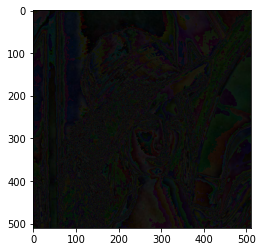

In [36]:
def square_matrix(square):
    tot_sum = 0
      
    # Calculate sum of all the pixels in 3 * 3 matrix
    for i in range(3):
        for j in range(3):
            tot_sum += square[i][j]
              
    return tot_sum // 9     # return the average of the sum of pixels
  
def boxBlur(image):
    square = []
    row = []
    blur_row = []
    blur_img = []
      
    rp, cp = 0, 0 
      
    while rp <= rows - 3: 
        while cp <= cols-3:
              
            for i in range(rp, rp + 3):
                  
                for j in range(cp, cp + 3):
                    row.append(image[i][j])
                square.append(square_row)
                row = []
            blur_row.append(square_matrix(square))
            square = []
              
            cp = cp + 1
          
        blur_img.append(blur_row)
        blur_row = []
        rp = rp + 1 # increase row pointer
        cp = 0 # start column pointer from 0 again
      
    return blur_img
  
blurred_img = boxBlur(img)
plt.imshow(blurred_img)
plt.show()